In [ ]:
# define and prepare "immutable" blocks
# define what are the parameters
# function(s)

In [ ]:
# function -- stats over time
# counters correlation -- normalized
# counters correlation -- no prep
# incremental counters
# snapshot counters

In [1]:
import json
import io
from IPython.display import display, JSON

file_name = 'parsable-stats-02.json'

# loading the JSON stats file
with open(file_name) as stats_json:
    stats_loaded = json.load(stats_json)

display(JSON(stats_loaded[0], expanded=False))

<IPython.core.display.JSON object>

In [2]:
import pandas as pd

# prepare the stats

stats_file = pd.read_json(file_name)
stats_normalized = pd.json_normalize(stats_file['stats'])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#stats_normalized.head()

# list columns
#print(stats_normalized.columns.tolist())

In [3]:
# Count counters
total_counters = len(stats_normalized.columns.tolist())
print("total counters: " + str(total_counters))

total counters: 588


In [4]:
# stats as data frame
stats_normalized_df = pd.DataFrame(stats_normalized)
stats_normalized_df.head()

,uptime,capture.kernel_packets,capture.kernel_drops,capture.errors,capture.afpacket.busy_loop_avg,capture.afpacket.polls,capture.afpacket.poll_signal,capture.afpacket.poll_timeout,capture.afpacket.poll_data,capture.afpacket.poll_errors,capture.afpacket.send_errors,decoder.pkts,decoder.bytes,decoder.invalid,decoder.ipv4,decoder.ipv6,decoder.ethernet,decoder.arp,decoder.unknown_ethertype,decoder.chdlc,decoder.raw,decoder.null,decoder.sll,decoder.sll2,decoder.tcp,decoder.udp,decoder.sctp,decoder.esp,decoder.icmpv4,decoder.icmpv6,decoder.ppp,decoder.pppoe,decoder.geneve,decoder.gre,decoder.vlan,decoder.vlan_qinq,decoder.vlan_qinqinq,decoder.vxlan,decoder.vntag,decoder.etag,decoder.ieee8021ah,decoder.teredo,decoder.ipv4_in_ipv4,decoder.ipv6_in_ipv4,decoder.ipv4_in_ipv6,decoder.ipv6_in_ipv6,decoder.mpls,decoder.avg_pkt_size,decoder.max_pkt_size,decoder.max_mac_addrs_src,decoder.max_mac_addrs_dst,decoder.erspan,decoder.nsh,decoder.event.afpacket.trunc_pkt,decoder.event.ipv4.pkt_too_small,decoder.event.ipv4.hlen_too_small,decoder.event.ipv4.iplen_smaller_than_hlen,decoder.event.ipv4.trunc_pkt,decoder.event.ipv4.opt_invalid,decoder.event.ipv4.opt_invalid_len,decoder.event.ipv4.opt_malformed,decoder.event.ipv4.opt_pad_required,decoder.event.ipv4.opt_eol_required,decoder.event.ipv4.opt_duplicate,decoder.event.ipv4.opt_unknown,decoder.event.ipv4.wrong_ip_version,decoder.event.ipv4.icmpv6,decoder.event.ipv4.frag_pkt_too_large,decoder.event.ipv4.frag_overlap,decoder.event.ipv4.frag_ignored,decoder.event.icmpv4.pkt_too_small,decoder.event.icmpv4.unknown_type,decoder.event.icmpv4.unknown_code,decoder.event.icmpv4.ipv4_trunc_pkt,decoder.event.icmpv4.ipv4_unknown_ver,decoder.event.icmpv6.unknown_type,decoder.event.icmpv6.unknown_code,decoder.event.icmpv6.pkt_too_small,decoder.event.icmpv6.ipv6_unknown_version,decoder.event.icmpv6.ipv6_trunc_pkt,decoder.event.icmpv6.mld_message_with_invalid_hl,decoder.event.icmpv6.unassigned_type,decoder.event.icmpv6.experimentation_type,decoder.event.ipv6.pkt_too_small,decoder.event.ipv6.trunc_pkt,decoder.event.ipv6.trunc_exthdr,decoder.event.ipv6.exthdr_dupl_fh,decoder.event.ipv6.exthdr_useless_fh,decoder.event.ipv6.exthdr_dupl_rh,decoder.event.ipv6.exthdr_dupl_hh,decoder.event.ipv6.exthdr_dupl_dh,decoder.event.ipv6.exthdr_dupl_ah,decoder.event.ipv6.exthdr_dupl_eh,decoder.event.ipv6.exthdr_invalid_optlen,decoder.event.ipv6.wrong_ip_version,decoder.event.ipv6.exthdr_ah_res_not_null,decoder.event.ipv6.hopopts_unknown_opt,decoder.event.ipv6.hopopts_only_padding,decoder.event.ipv6.dstopts_unknown_opt,decoder.event.ipv6.dstopts_only_padding,decoder.event.ipv6.rh_type_0,decoder.event.ipv6.zero_len_padn,decoder.event.ipv6.fh_non_zero_reserved_field,decoder.event.ipv6.data_after_none_header,decoder.event.ipv6.unknown_next_header,decoder.event.ipv6.icmpv4,decoder.event.ipv6.frag_pkt_too_large,decoder.event.ipv6.frag_overlap,decoder.event.ipv6.frag_invalid_length,decoder.event.ipv6.frag_ignored,decoder.event.ipv6.ipv4_in_ipv6_too_small,decoder.event.ipv6.ipv4_in_ipv6_wrong_version,decoder.event.ipv6.ipv6_in_ipv6_too_small,decoder.event.ipv6.ipv6_in_ipv6_wrong_version,decoder.event.tcp.pkt_too_small,decoder.event.tcp.hlen_too_small,decoder.event.tcp.invalid_optlen,decoder.event.tcp.opt_invalid_len,decoder.event.tcp.opt_duplicate,decoder.event.udp.pkt_too_small,decoder.event.udp.hlen_too_small,decoder.event.udp.hlen_invalid,decoder.event.udp.len_invalid,decoder.event.sll.pkt_too_small,decoder.event.sll2.pkt_too_small,decoder.event.ethernet.pkt_too_small,decoder.event.ethernet.unknown_ethertype,decoder.event.ppp.pkt_too_small,decoder.event.ppp.vju_pkt_too_small,decoder.event.ppp.ip4_pkt_too_small,decoder.event.ppp.ip6_pkt_too_small,decoder.event.ppp.wrong_type,decoder.event.ppp.unsup_proto,decoder.event.pppoe.pkt_too_small,decoder.event.pppoe.wrong_code,decoder.event.pppoe.malformed_tags,decoder.event.gre.pkt_too_small,decoder.event.gre.wrong_version,decoder.event.gre.version0_recur,decoder.event.gre.version0_flags,decoder

In [5]:
import datetime

datetime_arr = stats_file['timestamp'].array
timestamps_arr = [x.timestamp() for x in datetime_arr]    

print(timestamps_arr[:10])

[1763004593.970532, 1763004601.973402, 1763004609.975128, 1763004617.976998, 1763004625.979433, 1763004633.981808, 1763004641.983679, 1763004649.984838, 1763004657.986027, 1763004665.987902]


In [6]:
import matplotlib as mlb
import matplotlib.pyplot as plt

def diff_values(counter_table):
    # incremental ones -- calculate deltas
    incremental_values = stats_normalized_df[counter_table]
    delta_values = [0]*(len(incremental_values))
    delta_values[0] = incremental_values[0]

    # iterate over the column values
    for i in range(1, len(incremental_values)):
        delta_values[i] = incremental_values[i] - incremental_values[i - 1]

    return delta_values
            
def plot_incremental_counter_over_time(time_array, y_counter, incremental):
    y_axis = stats_normalized_df[y_counter]
    if incremental:
        y_axis = diff_values(y_counter)

    title = y_counter + ' over time'
    
    plt.figure(figsize=(20, 7), facecolor='xkcd:orange', layout='constrained')
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel(y_counter)
    plt.plot(time_array, y_axis, color='orange')
    
    plt.show()

def plot_correlate_counters(x_counter, y_counter, x_incremental, y_incremental):
    x_axis = stats_normalized_df[x_counter]
    y_axis = stats_normalized_df[y_counter]
    if x_incremental:
        x_axis = diff_values(x_counter)
    if y_incremental:
        y_axis = diff_values(y_counter)

    title = y_counter + ' over ' + x_counter
    
    plt.figure(figsize=(20, 7), facecolor='xkcd:sky blue', layout='constrained')
    plt.title(title)
    plt.scatter(x_axis, y_axis, color='xkcd:green')
    plt.xlabel(x_counter)
    plt.ylabel(y_counter)
    plt.plot(x_axis, y_axis, color='xkcd:blue')
    
    plt.show()

def plot_correlate_2_y_counters(time, y1_counter, y1_incr, y2_counter, y2_incr):
    y1_axis = stats_normalized_df[y1_counter]
    y2_axis = stats_normalized_df[y2_counter]
    if y1_incr:
        y1_axis = diff_values(y1_counter)
    if y2_incr:
        y2_axis = diff_values(y2_counter)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    title = y1_counter + ' and ' + y2_counter + ' over time'
    ax1.plot(time, y1_axis, color='orange')
    ax2.plot(time, y2_axis, color='blue')

    plt.title(title)
    ax1.set_xlabel('time', fontsize=14)
    ax1.set_ylabel(y1_counter, fontsize=14)
    ax2.set_ylabel(y2_counter, fontsize=14)

    plt.show()

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# decoder.bytes
# decoder.pkts
# capture.kernel_drops
# flow.memuse
# tcp.memuse

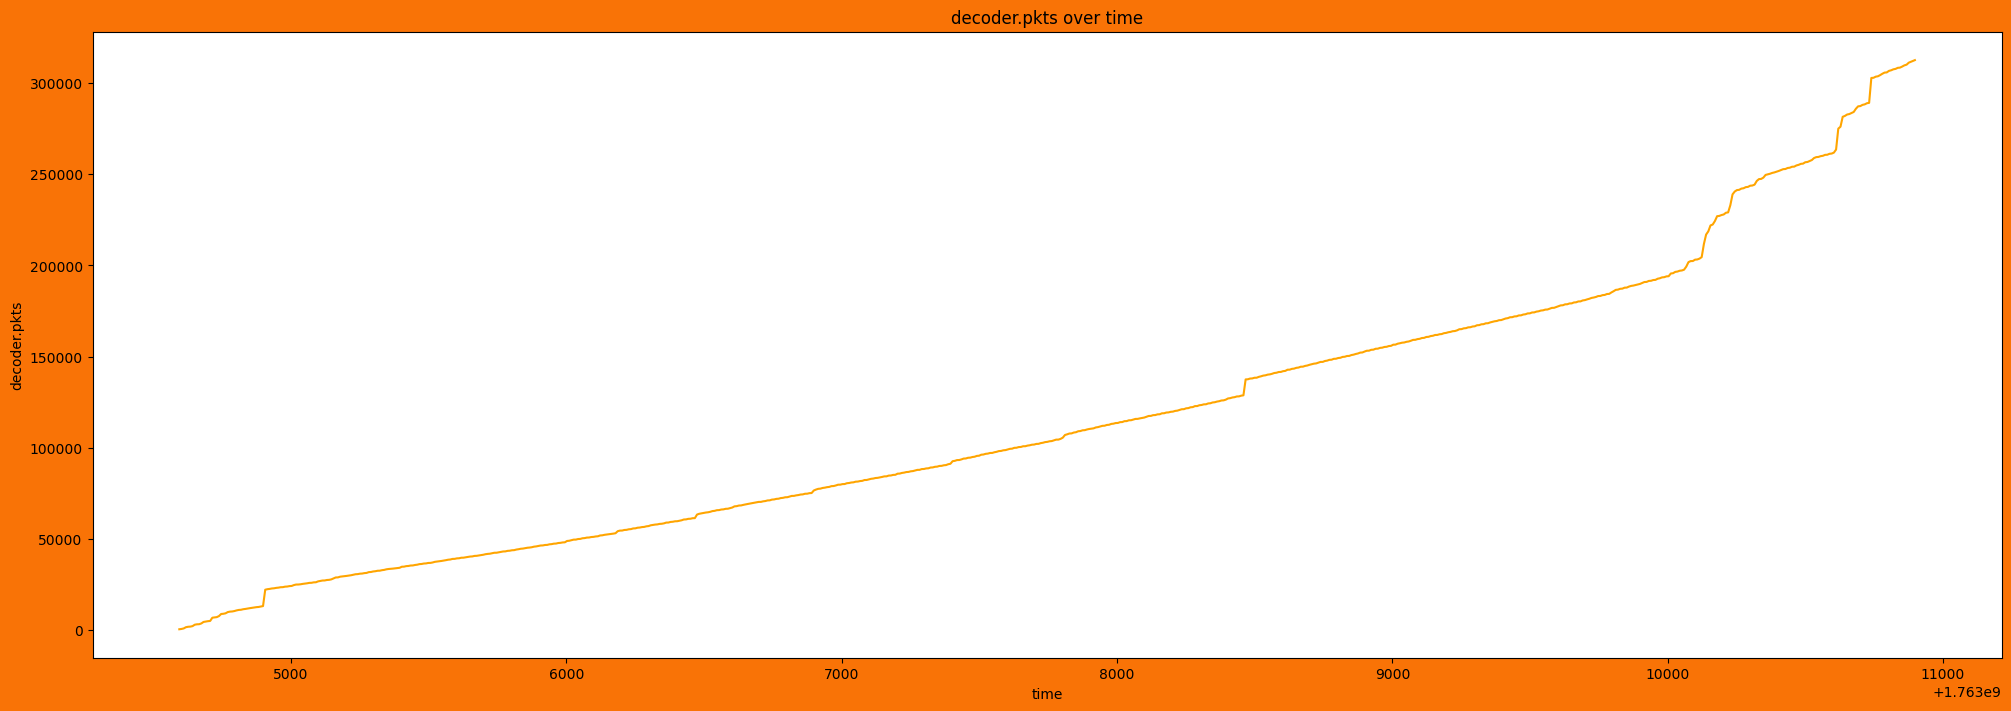

In [7]:
plot_incremental_counter_over_time(timestamps_arr, 'decoder.pkts', False)

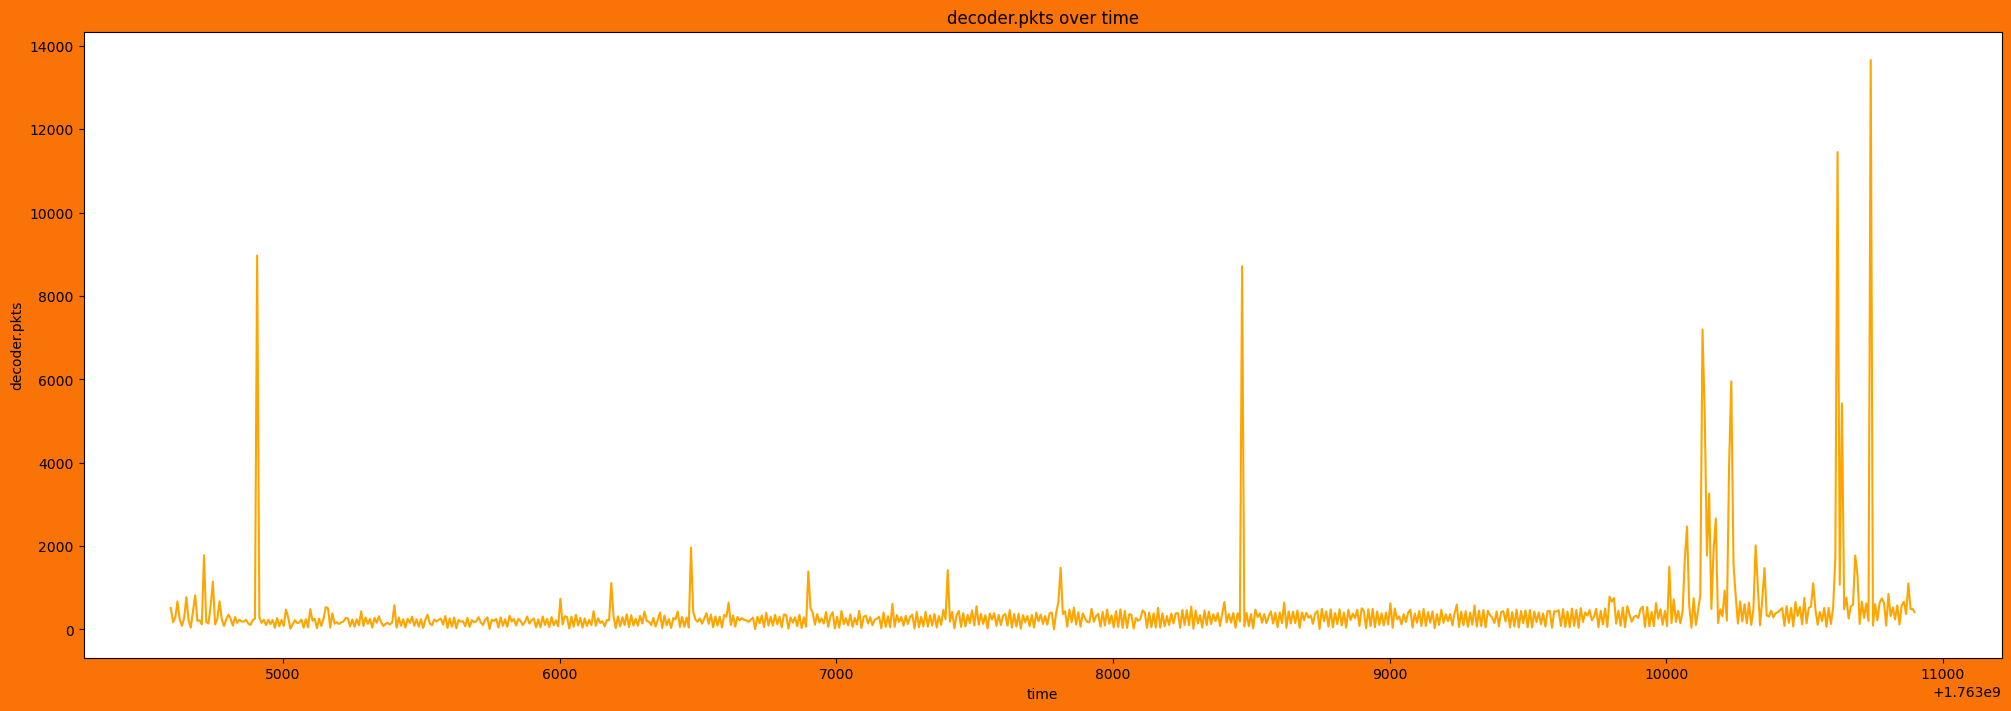

In [8]:
plot_incremental_counter_over_time(timestamps_arr, 'decoder.pkts', True)

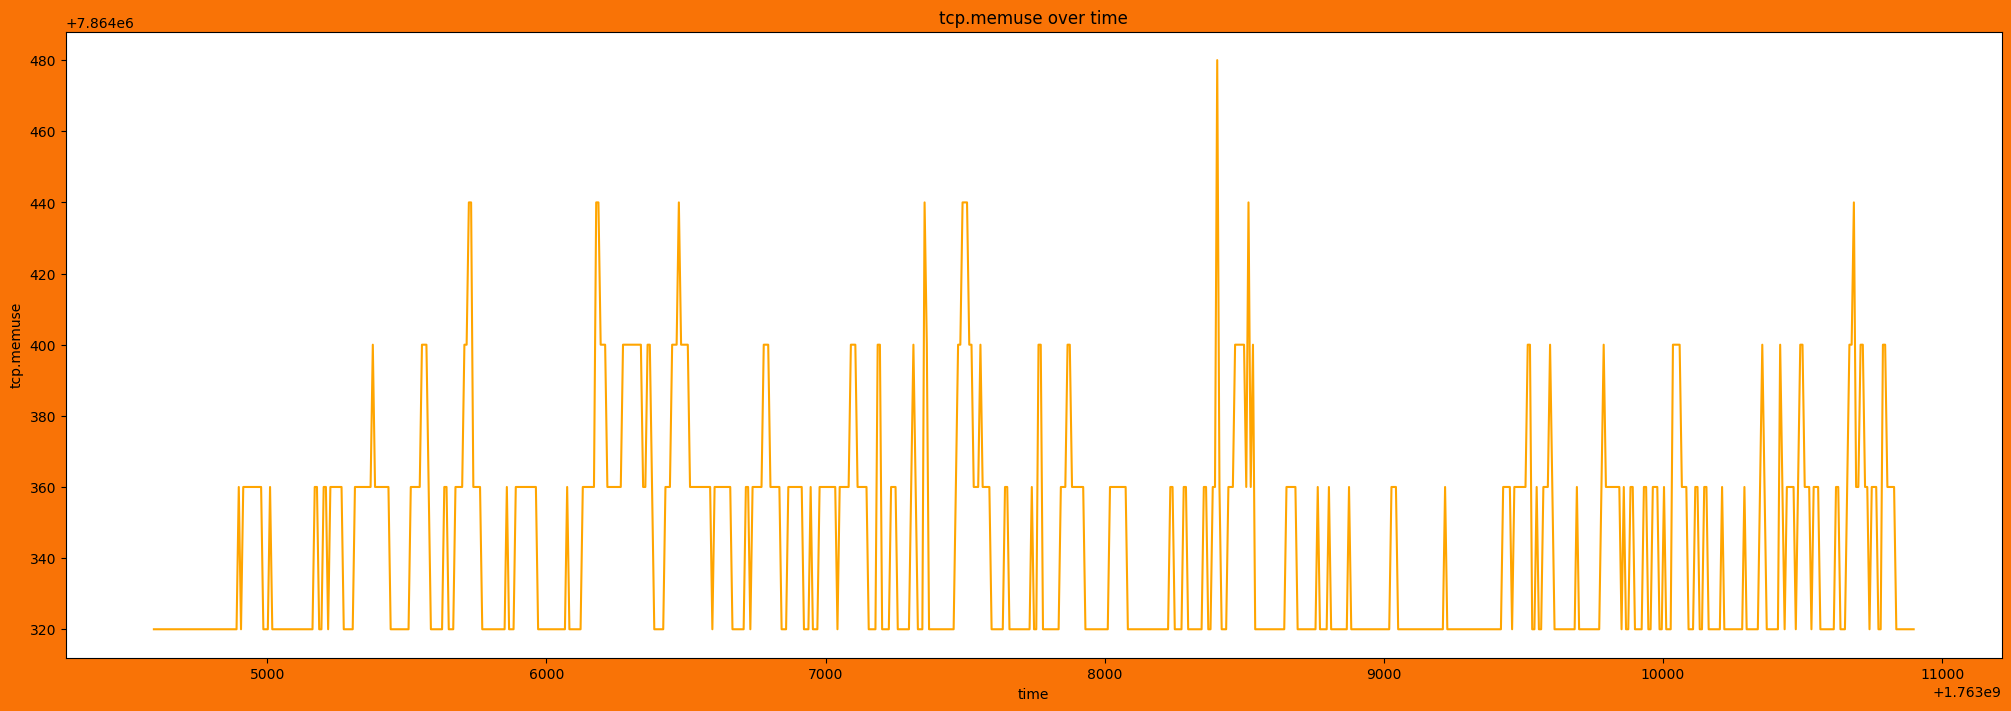

In [48]:
plot_incremental_counter_over_time(timestamps_arr, 'tcp.memuse', False)

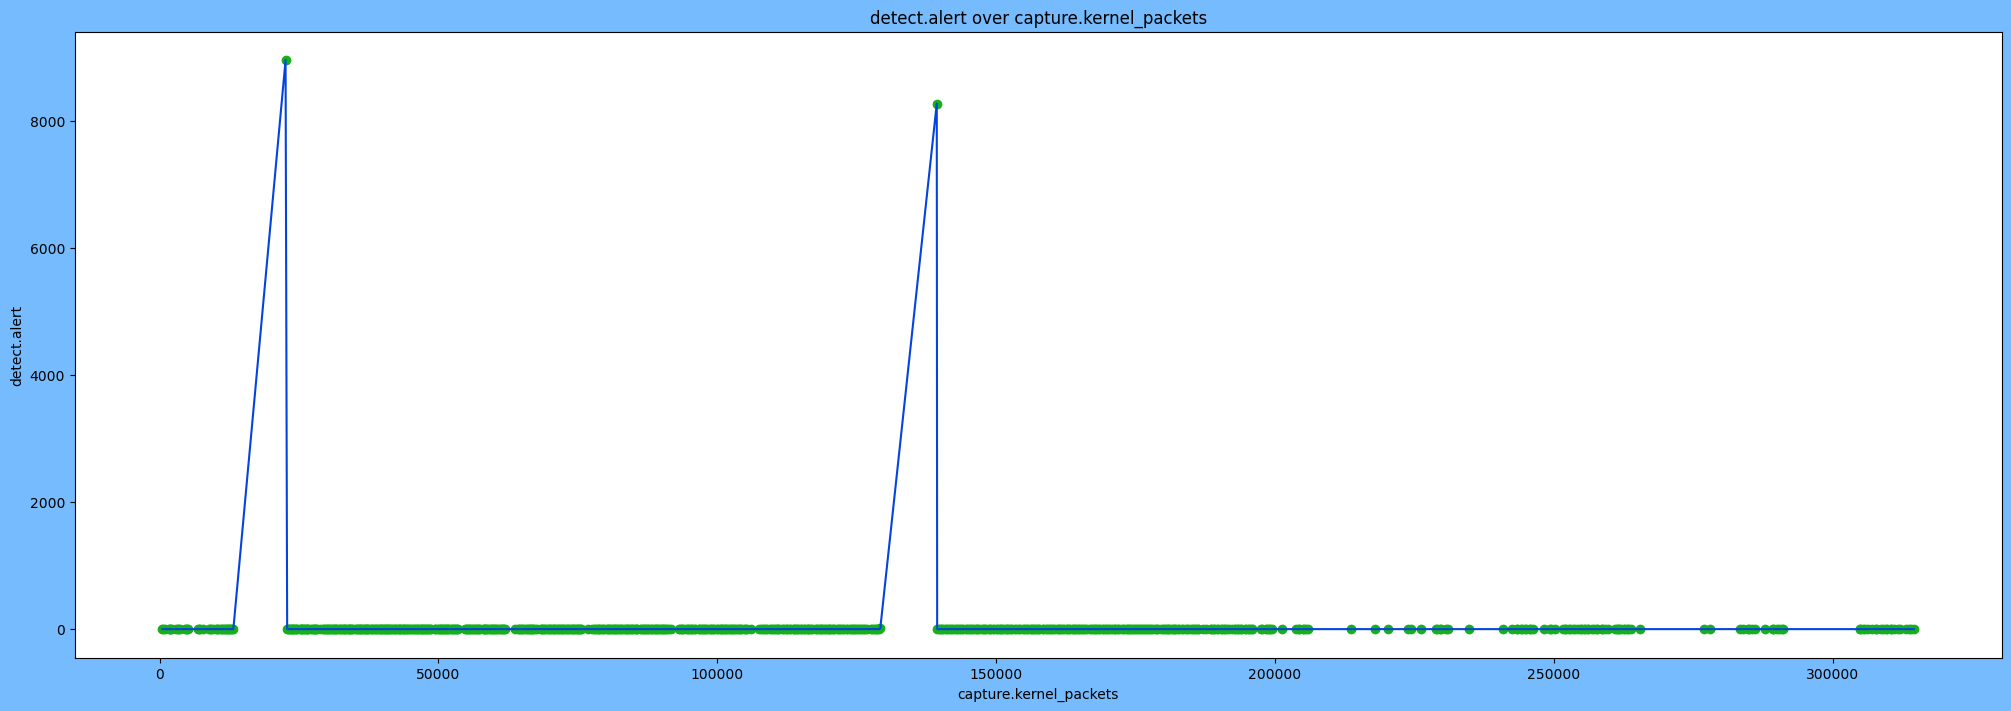

In [9]:
plot_correlate_counters('capture.kernel_packets', 'detect.alert', False, True)

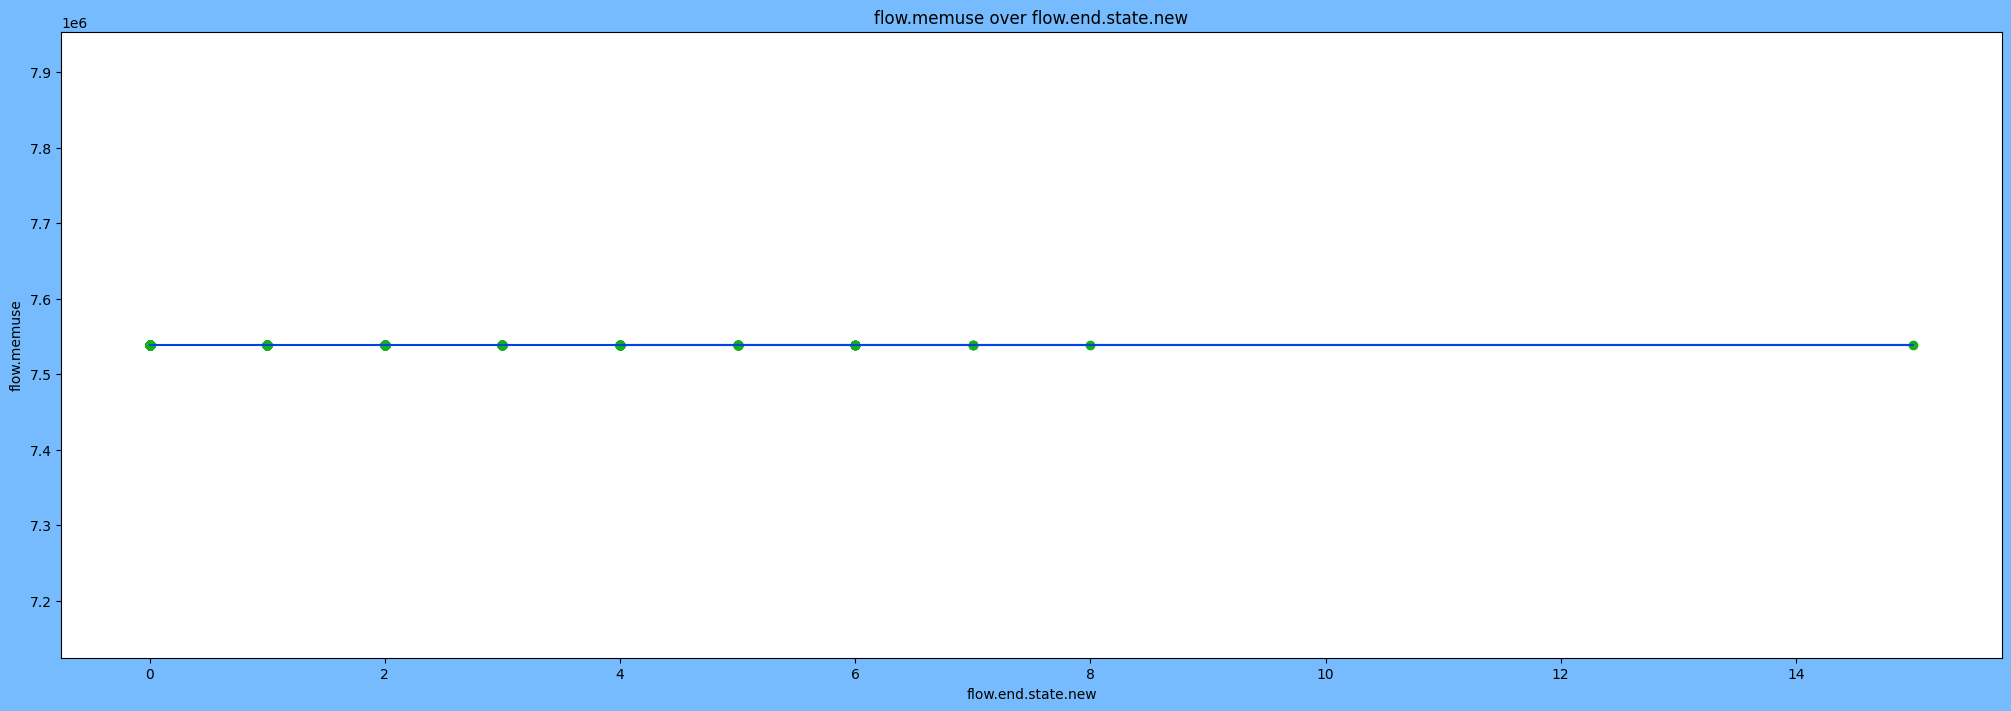

In [55]:
plot_correlate_counters('flow.end.state.new', 'flow.memuse', True, False)

In [2]:
#plot_correlate_counters('flow.memcap', 'flow.end.state.new', False, False)
# exception policies versus memcap?

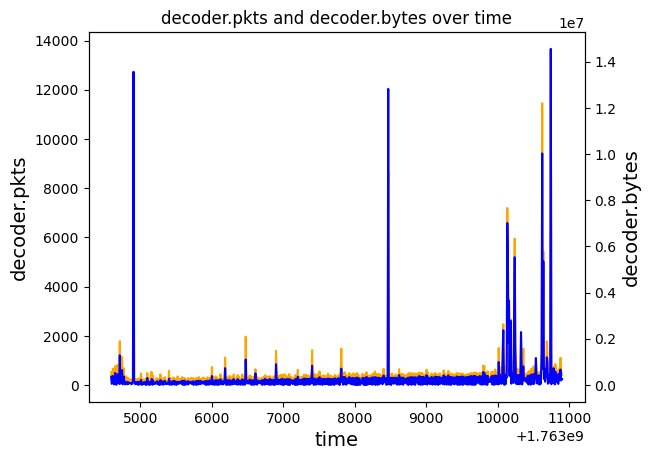

In [60]:
plot_correlate_2_y_counters(timestamps_arr, 'decoder.pkts', True, 'decoder.bytes', True)

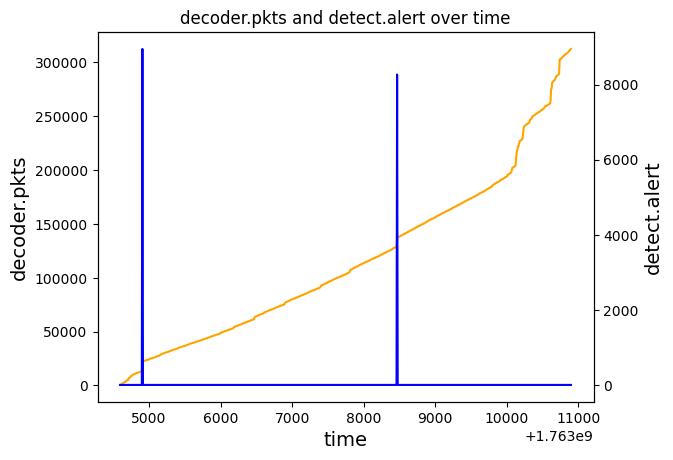

In [61]:
plot_correlate_2_y_counters(timestamps_arr, 'decoder.pkts', False, 'detect.alert', True)